This notebook aims to briefly explore the K Nearest Nierboughs Basic Algorithm
Both item-based and user-based models will be tested to determine if one way is more effective
than the other

In [1]:
import random, time

# import modules
from surprise import KNNBasic, Dataset
from surprise.model_selection import KFold
from surprise.accuracy import mae, mse, rmse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from own_algorithms.helper import testing_algorithm


In [2]:
# load data and split into A/B sets, A for CFV and B for unbiased testing
data = Dataset.load_builtin('ml-100k')
raw_ratings= data.raw_ratings

random.seed(2001)
np.random.seed(2001)
random.shuffle(raw_ratings)

# create threshold for unseen, 80-20
cutoff = int(0.8 * len(raw_ratings))
A_raw= raw_ratings[:cutoff]
B_raw= raw_ratings[cutoff:]

# data is now only set A ratings
data.raw_ratings= A_raw


In [3]:

algo = KNNBasic(sim_options={'user_based': False}, verbose=False)
IB_scores= testing_algorithm(algo, data)


In [4]:
IB_scores

array([0.9898691 , 0.97985935, 0.7835603 , 0.28820171, 1.67625036])

In [5]:
algo = KNNBasic(sim_options={'user_based': True}, verbose=False)
UB_scores= testing_algorithm(algo, data)
UB_scores


array([0.98991427, 0.97994319, 0.78229889, 0.20761881, 1.44556499])

In [6]:
columns=pd.array(['RMSE', 'MSE', 'MAE', 'Fit Time', 'Predict Time'])
KNN_df= pd.DataFrame(data=[IB_scores, UB_scores], columns=columns)
KNN_df.insert(0,'Algorithm', ['User-Based','Item-Based'] )
KNN_df.to_csv('./algo_data/KNNBasic_defaultK_User_Item.csv', index=False)



In [7]:
KNN_df

,Algorithm,RMSE,MSE,MAE,Fit Time,Predict Time
0,User-Based,0.989869,0.979859,0.783560,0.288202,1.676250
1,Item-Based,0.989914,0.979943,0.782299,0.207619,1.445565


In [8]:
accuracy= KNN_df.drop(['Fit Time', 'Predict Time'], axis=1)
accuracy.set_index('Algorithm')

,RMSE,MSE,MAE
Algorithm,,,
User-Based,0.989869,0.979859,0.783560
Item-Based,0.989914,0.979943,0.782299


In [9]:
ib= accuracy.loc[0].values[1:]
ub= accuracy.loc[1].values[1:]

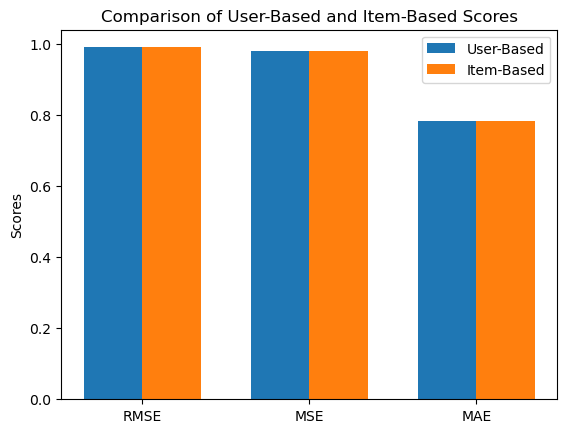

In [10]:


labels = ['RMSE', 'MSE', 'MAE']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ub, width, label='User-Based')
rects2 = ax.bar(x + width/2, ib, width, label='Item-Based')

ax.set_ylabel('Scores')
ax.set_title('Comparison of User-Based and Item-Based Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.savefig('./KNN Graphs/Item_vs_User_Accuracy')
plt.show()

Now that each method has been tested using the default setups, the next step is to
tweak the paramater such as simularity measures and k number